In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataframe = pd.read_csv('big_data.csv')

/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_48900/1281625065.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,13,14,18,19,21,22,23,24,25,26,29,30,57,58,59,60,64,65,66,67,70,71,74,75,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('big_data.csv')


In [19]:
pd.set_option('display.max_columns', None)
dataframe.head()

,INV_ACCOUNT_ID,INV_USER_ID,INV_PRODUCT_TYPE,INV_APP_START,INV_APP_COMPLETE,INV_EVENT,INV_SIGN_EVENT,INV_START_TIME,INV_SIGN_TIME,INV_OPEN,INV_CLOSE,INV_SELF_FUND_DATE,INV_FUND_AMOUNT_SELF,INV_TRANSFER_ACTION,INV_ACTION_DATE,BUSINESS_ACCOUNT_NUMBER,BANKING_ACCOUNT_ID,MONEY_USER_ID,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,FICO,FICO_BUCKET,MONEY_DATA_UPDATE_DATE,MONEY_FIRST_FUND_DATE,MONEY_FIRST_DIRECT_DEPOSIT_DATE,MONEY_UPGRADE_OPEN_DATE,MONEY_DIRECT_DEPOSIT_ACTIVE,MONEY_TOTAL_BALANCE,FUNNEL_USER_ID,CSM_START,CSM_ACTIVATION,CSM_USER_ID,RELAY_CREDIT_CARD_LIMIT,RELAY_CREDIT_CARD_BALANCE,RELAY_CREDIT_CARD_UTILIZATION,RELAY_CREDIT_CARD_MONTHLY_PAYMENT,RELAY_REVOLVING_CREDIT_BALANCE,RELAY_REVOLVING_CREDIT_UTILIZATION,RELAY_AUTO_INSTALLMENT_BALANCE,RELAY_AUTO_INSTALLMENT_UTILIZATION,RELAY_MORTGAGE_BALANCE,RELAY_MORTGAGE_UTILIZATION,RELAY_MORTGAGE_MONTHLY_PAYMENT,RELAY_STUDENT_LOAN_BALANCE,RELAY_STUDENT_LOAN_UTILIZATION,RELAY_FEDERAL_STUDENT_LOAN_BALANCE,RELAY_FEDERAL_STUDENT_LOAN_UTILIZATION,RELAY_PRIVATE_STUDENT_LOAN_BALANCE,RELAY_PRIVATE_STUDENT_LOAN_UTILIZATION,RELAY_UNSECURED_NON_STUDENT_LOAN_BALANCE,RELAY_UNSECURED_NON_STUDENT_LOAN_UTILIZATION,RELAY_TOTAL_AVG_AGE_OF_CREDIT,RELAY_TOTAL_CURRENT_BALANCE,RELAY_TOTAL_TRADELINE_COUNT,RELAY_FICO_SCORE,RELAY_TU_SCORE,RELAY_NON_VERIFIED_INCOME,RELAY_CURRENT_STATE,RELAY_MARKETING_EMAIL_PREFERENCE,RELAY_MARKETING_SMS_PREFERENCE,RELAY_MARKETING_AUTO_DIAL_PREFERENCE,ROW_NUM,DS_LOAN_APPLICANT_ID,LOAN_APPLICATION_ID,LOAN_TIME_START,LOAN_TIME_SUBMIT,LOAN_TIME_APPROVED,LOAN_TIME_FUND,LOAN_AMT,LOAN_GROSS_INCOME,LOAN_CURRENT_ACTIVITY,LOAN_APP_STATUS,LBD_LOAN_APPLICANT_ID,LOAN_ID,LOAN_STATUS,LOAN_NEXT_PAYMENT_DATE,LOAN_DAYS_PAST_DUE,LOAN_DELINQUENT_DATE,LOAN_MATURITY_DATE,uses_invest,uses_money,uses_relay,uses_loan,num_products,date_of_creating_new_columns,days_with_invest,days_with_money,days_with_relay
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20589564.0,2021-10-25T10:13:21.429Z,2021-10-25,20589564.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.857143,3163.0,7.0,551.0,515.0,120000.0,GA,OPT_OUT,OPT_OUT,OPT_OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,1,2023-02-14,NaN,NaN,477.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26982409.0,2022-12-05T19:51:11.769Z,2022-12-05,26982409.0,NaN,NaN,NaN,NaN,3554.0,1.015429,NaN,NaN,NaN,NaN,NaN,8090.0,1.470909,NaN,NaN,8090.0,1.470909,NaN,NaN,1620.000000,13031.0,7.0,NaN,577.0,NaN,MI,OPT_IN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,1,2023-02-14,NaN,NaN,71.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17260053.0,2022-07-06T12:58:07.807Z,2022-07-06,17260053.0,NaN,NaN,NaN,NaN,21703.0,0.300180,5008.0,0.27779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1538.700000,26711.0,10.0,697.0,702.0,25000.0,IA,OPT_OUT,OPT_OUT,OPT_OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,1,2023-02-14,NaN,NaN,223.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16802484.0,2020-09-14T11:49:29.473Z,2020-09-14,16802484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731.750000,3270.0,4.0,NaN,621.0,0.0,CA,OPT_OUT,OPT_OUT,OPT_OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,1,2023-02-14,NaN,NaN,883.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22587155.0,2022-05-11T21:54:23.976Z,2022-05-11,22587155.0,44500.0,5353.0,0.120292,40.0,5353.0,0.120292,47856.0,0.95923,403899.0,0.966266,2369.0,NaN,NaN,NaN,NaN,NaN,NaN,39999.0,0.909068,1377.428571,497107.0,7.0,786.0,750.0,11

In [43]:
print(len(dataframe))

6506726


In [4]:
dataframe['INV_USER_ID'].isna().sum()/len(dataframe)

0.9867228157448155

In [5]:
percent_with_invest = 1 - (dataframe['INV_USER_ID'].isna().sum()/len(dataframe))

print(f"{percent_with_invest}% of people use Invest")

percent_with_money = 1 - (dataframe['MONEY_USER_ID'].isna().sum()/len(dataframe))

print(f"{percent_with_money}% of people use Money")

percent_with_relay = 1 - (dataframe['CSM_USER_ID'].isna().sum()/len(dataframe))

print(f"{percent_with_relay}% of people use Relay")

percent_with_a_loan = 1 - (dataframe['DS_LOAN_APPLICANT_ID'].isna().sum()/len(dataframe))

print(f"{percent_with_a_loan}% of people have a Loan")


print(percent_with_invest + percent_with_money + percent_with_relay + percent_with_a_loan)

0.013277184255184538% of people use Invest
0.5452250486650275% of people use Money
0.2812339108792963% of people use Relay
0.18401189784232497% of people have a Loan
1.0237480416418334


In [20]:
#create columns that show if a person uses a product
dataframe["uses_invest"] = ~dataframe['INV_USER_ID'].isna() 
dataframe["uses_money"] = ~dataframe['MONEY_USER_ID'].isna()
dataframe["uses_relay"] = ~dataframe['CSM_USER_ID'].isna() 
dataframe["uses_loan"] = ~dataframe['DS_LOAN_APPLICANT_ID'].isna()

#There is a difference between open & actively using the product, focus more on actively using products

# invest/money - do they have a balance?
# loans - do they have a non-written off loan balance? 
# -summarize a user's loan experience (num_loans, outstanding balance, etc)
# -loan member summary daily, shows how each loan changes over time etc. 
# Relay - do they log in? 
# - Relay budgeting tool, do they have linked bank accounts that are active?
# - Do they have the CSM, are they logged in? 

#fixing the pull - Michael comes to the rescue 
# - users can have multiple accounts, we need to sum up on the user before we can join! 
# - Michael suggests normalizing everything on the user. For now, disregard that they have multiple accounts on things like Money
# -- Why doesn't Ethan's method work?
# - full outer join might be problematic, creating full dataset with lots of empty rows
# - make sure we have all the products seperately, then union them. 
# - you could then make a user view by just grouping on the user
# - I finally understand why luke wanted us to do things the way he originally told us to lol
# - sanity check: look at member_summary_daily as a proof that we're in the right ballpark of user data. 
# - use slack: "we have x number of invest users, is that in the ballpark?" for sanity checks. 
# Throw stuff in chat!! We can get help!!! 

#create column that shows how many products a person uses
dataframe["num_products"] = (dataframe[['uses_invest', 'uses_money', 'uses_relay', 'uses_loan']] == True).sum(axis=1)

# create a column that shows how long a person has used a product. If they have never used a product, it will be NaN

dataframe['date_of_creating_new_columns'] = pd.to_datetime('today').date()

dataframe['INV_OPEN'] = pd.to_datetime(dataframe['INV_OPEN']).dt.date
dataframe['days_with_invest'] = (dataframe['date_of_creating_new_columns'] - dataframe['INV_OPEN']).dt.days

dataframe['MONEY_ACCOUNT_OPEN_DATE'] = pd.to_datetime(dataframe['MONEY_ACCOUNT_OPEN_DATE']).dt.date
dataframe['days_with_money'] = (dataframe['date_of_creating_new_columns'] - dataframe['MONEY_ACCOUNT_OPEN_DATE']).dt.days

dataframe['CSM_ACTIVATION'] = pd.to_datetime(dataframe['CSM_ACTIVATION']).dt.date
dataframe['days_with_relay'] = (dataframe['date_of_creating_new_columns'] - dataframe['CSM_ACTIVATION']).dt.days

dataframe['LOAN_TIME_START'] = pd.to_datetime(dataframe['LOAN_TIME_START']).dt.date
dataframe['days_with_loan'] = (dataframe['date_of_creating_new_columns'] - dataframe['LOAN_TIME_START']).dt.days

<AxesSubplot: >

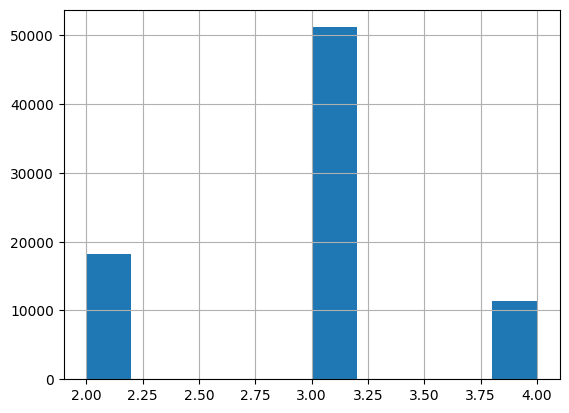

In [45]:
dataframe[dataframe['num_products'] > 1]['num_products'].hist()

# Understanding the xbuy journey


## Single product users

5686


<BarContainer object of 4 artists>

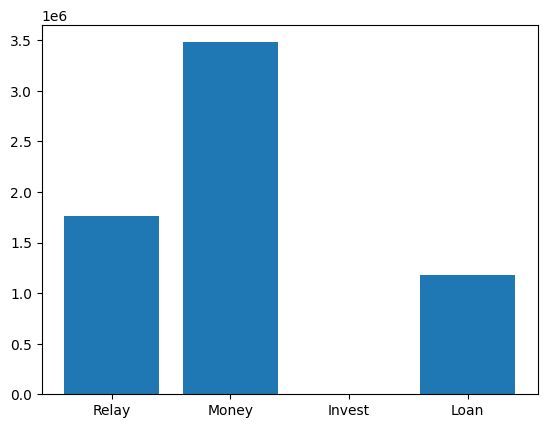

In [42]:
#get the number of people who only have one product and use relay
just_relay = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_relay'] == True)]['num_products'].count()
just_money = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_money'] == True)]['num_products'].count()
just_invest = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_invest'] == True)]['num_products'].count()
just_loan = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_loan'] == True)]['num_products'].count()

print(just_invest)

#make a bar graph of the number of people who only have one product
plt.bar(['Relay', 'Money', 'Invest', 'Loan'], [just_relay, just_money, just_invest, just_loan])

<BarContainer object of 3 artists>

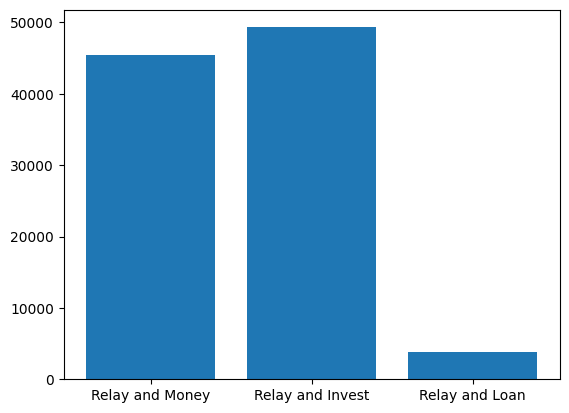

In [41]:
num_relay_money = len(dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_money'] == True) & (dataframe['num_products'] == 2)])
num_relay_invest = len(dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_invest'] == True) & (dataframe['num_products'] == 2)])
num_relay_loan = len(dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_loan'] == True) & (dataframe['num_products'] == 2)])

# make a bar graph of the number of people who have two products
plt.bar(['Relay and Money', 'Relay and Invest', 'Relay and Loan'], [num_relay_money, num_relay_invest, num_relay_loan])

In [37]:
relay_money = dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_money'] == True) & (dataframe['num_products'] == 2) & (dataframe['days_with_relay'] > dataframe['days_with_money'])]['num_products'].count()
relay_invest = dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_invest'] == True) & (dataframe['num_products'] == 2) & (dataframe['days_with_relay'] > dataframe['days_with_invest'])]['num_products'].count()
relay_loan = dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_loan'] == True) & (dataframe['num_products'] == 2) & (dataframe['days_with_relay'] > dataframe['days_with_loan'])]['num_products'].count()

# make a bar graph of the number of people who have two products
# plt.bar(['Relay and Money', 'Relay and Invest', 'Relay and Loan'], [relay_money, relay_invest, relay_loan])


0


# Can we predict xbuy from Relay into Invest/Money/PL? 


In [23]:
# create a df where uses_relay is True and num_products > 1 and days_with_relay is the max of days_with_relay, days_with_invest, days_with_money, days_with_loan
relay_xbuy = dataframe[(dataframe['uses_relay'] == True) & (dataframe['num_products'] > 1)]
relay_xbuy = relay_xbuy[relay_xbuy['days_with_relay'] == relay_xbuy[['days_with_relay', 'days_with_invest', 'days_with_money', 'days_with_loan']].max(axis=1)]


In [ ]:
# because there are 4 products, and we are starting with relay, we want to know how many people use invest, money, and loan after using relay
# we can do this by counting the number of people who use invest, money, and loan after using relay (for those who use relay and one other product)



In [25]:
#show the number of people who use invest, money, and loan as their next product after using relay
relay_xbuy['num_products'].value_counts()

3    24890
2     5088
4      867
Name: num_products, dtype: int64